In [220]:
import pandas as pd
import numpy as np
import math as m
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib.ticker import FuncFormatter
sns.set_style('darkgrid')

# Parameters

In [221]:
def ten_pow(n): return 10 ** n

def I(V_R_line, V_RLC):
    return (V_R_line / V_RLC)

def phi(Δt_T):
    return 2 * m.pi * Δt_T

In [222]:
path = 'circuito_RLC/'

# Valores fornecidos
C = 1.02 # µF
L = 1.250  # mH
v0 = 1 / (2 * m.pi * m.sqrt(L * ten_pow(-3) * C * ten_pow(-6)))  # kHz
R_line = 9.9  # Ohm
R_D = .9  # Ohm
R_L = .9  # Ohm
R = R_D + R_L  # Ohm
Gamma = 1440  # s^-1

# Frequência natural angular
omega_0 = v0 * 2 * m.pi

# Step size 1

**Equação do circuito:** 

$$L \frac{d^2 I(t)}{dt^2} = - \frac{I(t)}{C} - R \frac{dI(t)}{dt} + \frac{dV(t)}{dt}$$

**Resposta estacionária:**

$$I_{2}(t) = I_0 (\omega) sen( \omega t - \phi)$$

onde $I_0(\omega) = \frac{\frac{\omega V_0}{L}}{\sqrt{(\omega^2 - \omega_0^2)^2 + \Gamma^2 \omega^2}}$,

onde $\omega_0 = \frac{1}{\sqrt{LC}}$, $\Gamma = \frac{R}{L}$ e $\tan \phi = \frac{(\omega L - \frac{1}{\omega C})}{R}$.

$I_0 (\omega) = \frac{V_0}{Z(\omega)}$, onde $Z(\omega) = \frac{\sqrt{(\omega^2 - \omega_0^2)^2 + \Gamma^2 \omega^2}}{\frac{\omega_0}{L}} = \sqrt{R^2 + (\omega L - \frac{1}{\omega C})^2}$.

**Resposta estacionária em termos de frequência e corrente “reduzidas”:**

$x = \frac{\omega}{\omega_0}$ e $I(x) = \frac{I_0 (\omega)}{\frac{V_0}{R}}$

$\frac{I_0 (\omega)}{\frac{V_0}{R}} = \frac{R}{Z (\omega)} = \frac{x}{ \sqrt{Q^2 (x^2 - 1)^2 + x^2} } = \frac{1}{\sqrt{Q^2 (x - \frac{1}{x})^2 + 1}}$, onde $Q = \frac{\omega_0 L}{R}$

**Valores “reduzidos” (adimensionais):**
Frequência:

$x = \frac{v}{v_0}$

Corrente:

$I(x) = \frac{\frac{V_{R'}}{R'}}{\frac{V_{RLC}}{R}} = (\frac{R}{R'}) (\frac{V_{R'}}{V_{RLC}})$

Diferença de fase:

$\phi = 2 \pi v \Delta t$, para cada valor de $R$ selecionado.

In [223]:
# Criação do dataframe
data = pd.DataFrame(
    {
        'v [kHz]': [4320, 5549, 6028, 6519, 6940, 7440, 7820, 8251, 8680, 9070, 9404, 3820, 3420, 2960, 2639, 2230, 1869, 1379, 1050, 650],
        'Δt / T': [0.01724, 0.2277, 0.2606, 0.2468, 0.2253, 0.2238, 0.2031, 0.2459, 0.2413, 0.2321, 0.2453, -0.1231, -0.1506, -0.1466, -0.2105, -0.1956, -0.2264, -0.2335, -0.2553, -0.3158],
        "V_R' [mV]": [2440, 1160, 1240, 1320, 1680, 1680, 1600, 1520, 1560, 1600, 1600, 2960, 2960, 3220, 1360, 1260, 1200, 2400, 2000, 1200],  # mV
        "V_RLC [mV]": [860, 1720, 2540, 3160, 4320, 4680, 5120, 5360, 6240, 6400, 6640, 3000, 4960, 7040, 4640, 5760, 6560, 18600, 20000, 21400]  # mV
    }
)

data["V_RLC [V]"] = data["V_RLC [mV]"] / 1000
data["V_R' [V]"] = data["V_R' [mV]"] / 1000

data['x'] = data['v [kHz]'] / v0
#data['I(x)'] = I(data["V_R' [V]"], data["V_RLC [V]"])
data['I(x)'] = data["V_R' [V]"] / data['V_RLC [V]']
data['phi(x)'] = data.apply(lambda row: row['Δt / T'], axis=1)
data['I(x)_reduced'] = data['I(x)'] / (v0 / R)

data.sort_values(by='v [kHz]')

,v [kHz],Δt / T,V_R' [mV],V_RLC [mV],V_RLC [V],V_R' [V],x,I(x),phi(x),I(x)_reduced
19,650,-0.31580,1200,21400,21.40,1.20,0.145830,0.056075,-0.31580,0.000023
18,1050,-0.25530,2000,20000,20.00,2.00,0.235572,0.100000,-0.25530,0.000040
17,1379,-0.23350,2400,18600,18.60,2.40,0.309385,0.129032,-0.23350,0.000052
16,1869,-0.22640,1200,6560,6.56,1.20,0.419319,0.182927,-0.22640,0.000074
15,2230,-0.19560,1260,5760,5.76,1.26,0.500311,0.218750,-0.19560,0.000088
14,2639,-0.21050,1360,4640,4.64,1.36,0.592072,0.293103,-0.21050,0.000118
13,2960,-0.14660,3220,7040,7.04,3.22,0.664090,0.457386,-0.14660,0.000185
12,3420,-0.15060,2960,4960,4.96,2.96,0.767293,0.596774,-0.15060,0.000241
11,3820,-0.12310,2960,3000,3.00,2.96,0.857035,0.986667,-0.12310,0.000398
0,4320,0.01724,2440,860,0.86,2.44,0.969212,2.837209,0.01724,0.001146


In [224]:
data.to_excel(path + 'table_1.xlsx', columns=data.columns.values)

# Step size 2

In [225]:
data_2 = pd.DataFrame(
    {
        'v [kHz]' : [4448, 4502, 4596, 4630, 4673, 4762, 4812, 4883, 4931, 4699, 4378, 4318, 4266, 4209, 4160, 4112, 4056, 4006, 3959, 3900],
        'Δt / T' : [.0001, .03631, .07404, .09267, .1273, .1698, .1698, .1800, .1765, .1321, -.08620, -.08620, -.10345, -.1333, -.1475, -.1639, -.1774, -.1774, -.1746, -.1846],
        "V_R' [mV]" : [2800, 2720, 2800, 2800, 2760, 3000, 3090, 3040, 3040, 3000, 3000, 3000, 3040, 3040, 3040, 3040, 3040, 3000, 3040, 3040],
        'V_RLC [mV]' : [936, 952, 1020, 1040, 1120, 1780, 1860, 2360, 2440, 1500, 1040, 1090, 1280, 1560, 1760, 1880, 2160, 2320, 2580, 2860]
    }
)

data_2["V_RLC [V]"] = data_2["V_RLC [mV]"] / 1000
data_2["V_R' [V]"] = data_2["V_R' [mV]"] / 1000

data_2['x'] = data_2['v [kHz]'] / v0
#data_2['I(x)'] = I(data_2["V_R' [V]"], data_2["V_RLC [V]"])
data_2['I(x)'] = data_2["V_R' [V]"] / data_2['V_RLC [V]']
data_2['phi(x)'] = data_2.apply(lambda row: row['Δt / T'], axis=1)
data_2['I(x)_reduced'] = data_2['I(x)'] / (v0 / R)

data_2.sort_values(by='v [kHz]')

,v [kHz],Δt / T,V_R' [mV],V_RLC [mV],V_RLC [V],V_R' [V],x,I(x),phi(x),I(x)_reduced
19,3900,-0.18460,3040,2860,2.860,3.04,0.874983,1.062937,-0.18460,0.000429
18,3959,-0.17460,3040,2580,2.580,3.04,0.888220,1.178295,-0.17460,0.000476
17,4006,-0.17740,3000,2320,2.320,3.00,0.898764,1.293103,-0.17740,0.000522
16,4056,-0.17740,3040,2160,2.160,3.04,0.909982,1.407407,-0.17740,0.000568
15,4112,-0.16390,3040,1880,1.880,3.04,0.922546,1.617021,-0.16390,0.000653
14,4160,-0.14750,3040,1760,1.760,3.04,0.933315,1.727273,-0.14750,0.000698
13,4209,-0.13330,3040,1560,1.560,3.04,0.944308,1.948718,-0.13330,0.000787
12,4266,-0.10345,3040,1280,1.280,3.04,0.957097,2.375000,-0.10345,0.000959
11,4318,-0.08620,3000,1090,1.090,3.00,0.968763,2.752294,-0.08620,0.001111
10,4378,-0.08620,3000,1040,1.040,3.00,0.982224,2.884615,-0.08620,0.001165


In [226]:
data_2.to_excel(path + 'table_2.xlsx', columns=data_2.columns.values)

# Mixing table 1 and table 2

In [227]:
data_3 =  pd.concat([data, data_2], axis=0)
data_3.sort_values(by='v [kHz]')
data_3

,v [kHz],Δt / T,V_R' [mV],V_RLC [mV],V_RLC [V],V_R' [V],x,I(x),phi(x),I(x)_reduced
0,4320,0.01724,2440,860,0.860,2.44,0.969212,2.837209,0.01724,0.001146
1,5549,0.22770,1160,1720,1.720,1.16,1.244944,0.674419,0.22770,0.000272
2,6028,0.26060,1240,2540,2.540,1.24,1.352409,0.488189,0.26060,0.000197
3,6519,0.24680,1320,3160,3.160,1.32,1.462568,0.417722,0.24680,0.000169
4,6940,0.22530,1680,4320,4.320,1.68,1.557021,0.388889,0.22530,0.000157
5,7440,0.22380,1680,4680,4.680,1.68,1.669198,0.358974,0.22380,0.000145
6,7820,0.20310,1600,5120,5.120,1.60,1.754453,0.312500,0.20310,0.000126
7,8251,0.24590,1520,5360,5.360,1.52,1.851150,0.283582,0.24590,0.000115
8,8680,0.24130,1560,6240,6.240,1.56,1.947398,0.250000,0.24130,0.000101
9,9070,0.23210,1600,6400,6.400,1.60,2.034896,0.250000,0.23210,0.000101


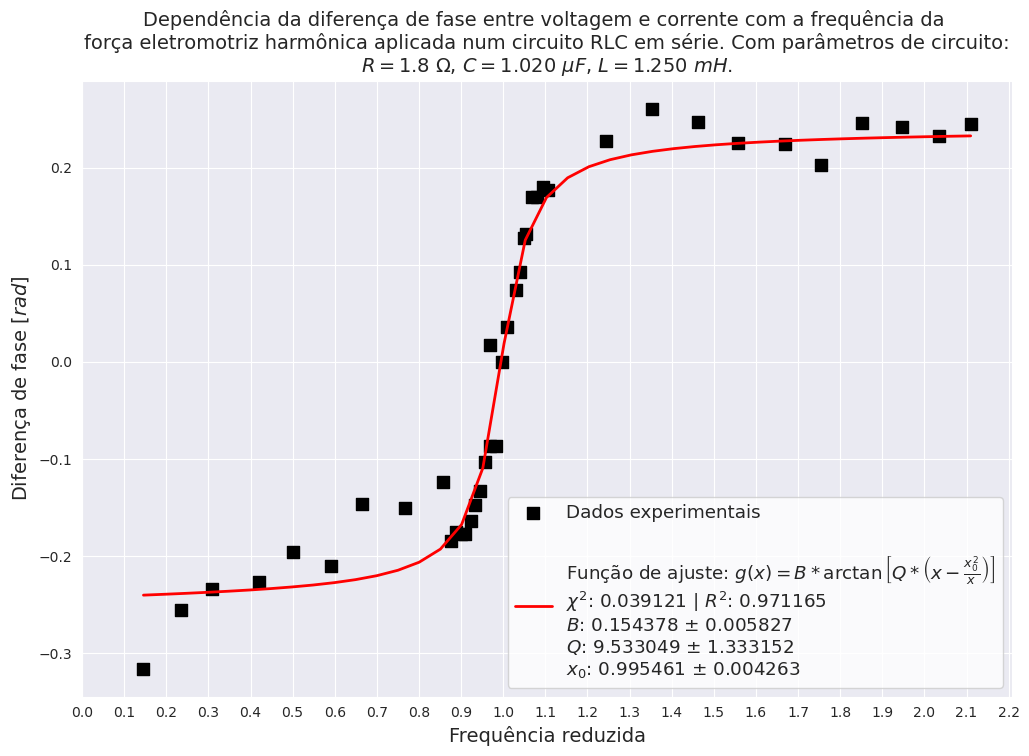

In [228]:
# Função de ajuste
def fit_function(x, B, Q, x0):
    return B * np.arctan(Q * (x - (x0 ** 2) / x))

# Valores iniciais dos parâmetros teóricos
B_initial = 1  # P1
Q_initial = 1 / R * np.sqrt(L / C)  # P2
x0_initial = 1  # P3

# Ajuste dos dados experimentais
popt, pcov = curve_fit(fit_function, data_3['x'], data_3['phi(x)'], p0=[B_initial, Q_initial, x0_initial])

# Parâmetros de ajuste
B_fit, Q_fit, x0_fit = popt

# Curva ajustada
x_values = np.linspace(min(data_3['x']), max(data_3['x']), len(data_3['x']))
y_values = fit_function(x_values, *popt)

# Cálculo do chi-square e do R-squared
residuals = data_3['phi(x)'] - fit_function(data_3['x'], *popt)
chi_square = np.sum(residuals ** 2)
r_squared = 1 - (np.sum(residuals ** 2) / np.sum((data_3['phi(x)'] - np.mean(data_3['phi(x)'])) ** 2))

# Extrair erros dos parâmetros do ajuste
perr = np.sqrt(np.diag(pcov))

# Parâmetros de ajuste com seus erros
B_fit, Q_fit, x0_fit = popt
B_fit_err, Q_fit_err, x0_fit_err = perr

# Formatar strings para inclusão na legenda
legend_title = '\n' + r'Função de ajuste: $g(x) = B * \arctan \left[ Q * \left(x - \frac{{x_{0}^{2}}}{{x}} \right) \right]$'
legend_chi_r = r'$\chi^2$: {:.6f} | $R^2$: {:.6f}'.format(chi_square, r_squared)
legend_p1 = r'$B$: {:.6f} $\pm$ {:.6f}'.format(B_fit, B_fit_err)
legend_p2 = r'$Q$: {:.6f} $\pm$ {:.6f}'.format(Q_fit, Q_fit_err)
legend_p3 = r'$x_0$: {:.6f} $\pm$ {:.6f}'.format(x0_fit, x0_fit_err)

legend_text = '\n'.join([legend_title, legend_chi_r, legend_p1, legend_p2, legend_p3])

# Função para formatar os ticks do eixo x
def format_x_ticks(x, pos):
    return f'{x:.1f}'

plt.figure(figsize=(12, 8))
plt.title(fr'Dependência da diferença de fase entre voltagem e corrente com a frequência da '+ '\n' + fr'força eletromotriz harmônica aplicada num circuito RLC em série. Com parâmetros de circuito:' + '\n' + fr'$R = {R}\ \Omega$, $C = {C:.3f}\ \mu F$, $L = {L:.3f}\ mH$.', fontsize=14)
plt.scatter(y=data_3['phi(x)'], x=data_3['x'], marker='s', color='black', s=75, label='Dados experimentais')
plt.plot(x_values, y_values, color='red', linestyle='-', label=f'{legend_text}', lw=2)
plt.ylabel(r'Diferença de fase [$rad$]', fontsize=14)
plt.xlabel('Frequência reduzida', fontsize=14)
plt.legend(facecolor='white', fontsize=13.2, loc='lower right')

# Ajustando os ticks do eixo x para espaçamento de 0.1 de 0 até 2.2
plt.xticks(np.arange(0, 2.3, 0.1))

# Aplicando a formatação dos ticks do eixo x
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_x_ticks))

# Definindo o limite inicial do eixo x
plt.xlim(left=0.)

plt.savefig(path + 'g(x).pdf')
plt.show()

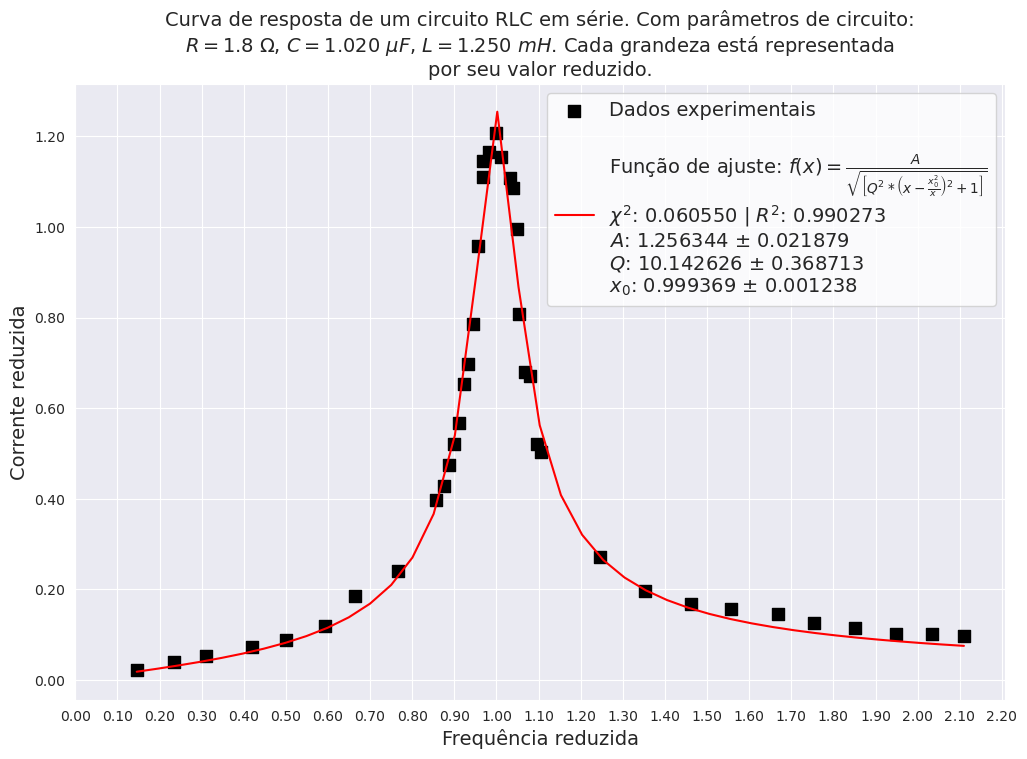

In [229]:
# Definir a função de ajuste
def fit_function_2(x, P1, P2, P3):
    return P1 / (np.sqrt((P2 ** 2) * ((x - ((P3 ** 2) / x)) ** 2) + 1))

# Valores iniciais dos parâmetros teóricos
A_initial = 1  # P1
Q_initial = 1 / R * np.sqrt(L / C)  # P2
x0_initial = 1  # P3

# Ajuste dos dados experimentais
popt, pcov = curve_fit(fit_function_2, data_3['x'], data_3['I(x)_reduced'] * 1000, p0=[A_initial, Q_initial, x0_initial])

# Parâmetros de ajuste
A_fit, Q_fit, x0_fit = popt

# Curva ajustada
x_values = np.linspace(min(data_3['x']), max(data_3['x']), len(data_3['x']))
y_values = fit_function_2(x_values, *popt)

# Cálculo do chi-square e do R-squared
residuals = data_3['I(x)_reduced'] * 1000 - fit_function_2(data_3['x'], *popt)
chi_square = np.sum(residuals ** 2)
r_squared = 1 - (np.sum(residuals ** 2) / np.sum((data_3['I(x)_reduced'] * 1000 - np.mean(data_3['I(x)_reduced'] * 1000)) ** 2))

# Extrair erros dos parâmetros do ajuste
perr = np.sqrt(np.diag(pcov))

# Parâmetros de ajuste com seus erros
A_fit, Q_fit, x0_fit = popt
A_fit_err, Q_fit_err, x0_fit_err = perr

# Formatar strings para inclusão na legenda
legend_title = '\n' + r'Função de ajuste: $f(x) = \frac{A}{\sqrt{ \left[ Q^{2} * \left(x - \frac{{x_{0}^{2}}}{{x}} \right)^2 + 1 \right] }}$'
legend_chi_r = r'$\chi^2$: {:.6f} | $R^2$: {:.6f}'.format(chi_square, r_squared)
legend_p1 = r'$A$: {:.6f} $\pm$ {:.6f}'.format(A_fit, A_fit_err)
legend_p2 = r'$Q$: {:.6f} $\pm$ {:.6f}'.format(Q_fit, Q_fit_err)
legend_p3 = r'$x_0$: {:.6f} $\pm$ {:.6f}'.format(x0_fit, x0_fit_err)

legend_text = '\n'.join([legend_title, legend_chi_r, legend_p1, legend_p2, legend_p3])

# Função para formatar os ticks do eixo x e y
def format_ticks(x, pos):
    return f'{x:.2f}'

# Função para formatar os ticks do eixo x e y
def format_ticks_2(x, pos):
    return f'{x:.2f}'

# Plot
plt.figure(figsize=(12, 8))
plt.scatter(y=data_3['I(x)_reduced'] * 1000, x=data_3['x'], marker='s', color='black', s=75, label='Dados experimentais')
plt.plot(x_values, y_values, color='red', linestyle='-', label=f'{legend_text}')
plt.ylabel('Corrente reduzida', fontsize=14)
plt.xlabel('Frequência reduzida', fontsize=14)

# Ajustando os ticks do eixo x para espaçamento de 0.1 de 0 até 2.2
plt.xticks(np.arange(0, 2.25, 0.1))

# Aplicando a formatação dos ticks do eixo x e y
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks_2))

plt.legend(facecolor='white', fontsize=14, loc='best')
plt.title(fr'Curva de resposta de um circuito RLC em série. Com parâmetros de circuito:' + '\n' + fr'$R = {R}\ \Omega$, $C = {C:.3f}\ \mu F$, $L = {L:.3f}\ mH$. Cada grandeza está representada' + '\n' + 'por seu valor reduzido.', fontsize=14)
#plt.grid()
plt.savefig(path + 'f(x).pdf')
plt.show()

# Uncertainty calculation

In [230]:
def calculate_uncertainties(R_line, R_L, R_D, L, C, v0, Gamma, R, x0_fit, Q_fit, x0_fit_err, Q_fit_err, omega_0):
    """
    Calcula as incertezas de várias grandezas elétricas com base nos valores fornecidos.

    Parâmetros:
    - R_line (float): Resistência da linha.
    - R_L (float): Resistência do indutor.
    - R_D (float): Resistência do capacitor.
    - L (float): Indutância em miliHenry (mH).
    - C (float): Capacitância em microFarad (μF).
    - v0 (float): Frequência natural angular em radianos por segundo (rad/s).
    - Gamma (float): Fator de amortecimento.
    - R (float): Resistência total.
    - x0_fit (float): Ajuste do parâmetro x0.
    - Q_fit (float): Ajuste do fator de qualidade Q.
    - x0_fit_err (float): Erro no ajuste do parâmetro x0.
    - Q_fit_err (float): Erro no ajuste do fator de qualidade Q.
    - omega_0 (float): Frequência angular natural em radianos por segundo (rad/s).

    Retorna:
    - None: A função imprime os valores das incertezas calculadas.
    """
    
    # Incertezas das resistências
    delta_R_line = ((R_line * .0008) + (4 * 0.1))  # Ohms
    delta_R_L = ((R_L * .0008) + (3 * 0.1))  # Ohms
    delta_R_D = ((R_D * .0008) + (3 * 0.1))  # Ohms

    # Incerteza combinada da resistência
    u_C_R = np.sqrt(delta_R_L ** 2 + delta_R_D ** 2)  # Ohms

    # Incerteza da indutância
    delta_L = (L * .02 + .008)  # mH

    # Incerteza da capacitância
    delta_C = (C * .0005 + .001)  # µF

    # Incerteza da frequência natural angular
    u_C_v0 = ((v0/1000) / 2) * m.sqrt((delta_L / L) ** 2 + (delta_C / C) ** 2)

    # Incerteza do fator de amortecimento
    u_C_Gamma = (Gamma) * m.sqrt((u_C_R / R) ** 2 + (delta_L / L) ** 2)

    # Ajuste do fator de amortecimento
    Gamma_ajust = (2 * m.pi * v0) * (x0_fit / Q_fit)

    # Incerteza da frequência angular natural
    u_C_omega_0 = u_C_v0 * 2 * m.pi

    # Incerteza do fator de amortecimento ajustado
    u_C_Gamma_ajust = ((Gamma_ajust / 1000) * m.sqrt(
        (((u_C_omega_0 * 10**3) / omega_0)**2) + 
        ((x0_fit_err / x0_fit) ** 2) + 
        ((Q_fit_err / Q_fit) ** 2)
    ))

    # Impressão dos resultados
    print(f'{v0=}')
    print(f'{delta_R_line=:}')
    print(f'{delta_R_L=:}')
    print(f'{delta_R_D=:}')
    print(f'{u_C_R=:}')
    print(f'{delta_L=:}') 
    print(f'{delta_C=:}')
    print(f'{u_C_v0=:}')
    print(f'{u_C_Gamma=:}')
    print(f'{Gamma_ajuste=:}')
    print(f'{omega_0=:}')
    print(f'{u_C_omega_0=:}')
    print(f'{u_C_Gamma_ajust=:}')

calculate_uncertainties(R_line, R_L, R_D, L, C, v0, Gamma, R, x0_fit, Q_fit, x0_fit_err, Q_fit_err, omega_0)

v0=4457.229941723846
delta_R_line=0.40792
delta_R_L=0.30072000000000004
delta_R_D=0.30072000000000004
u_C_R=0.4252823024768372
delta_L=0.033
delta_C=0.00151
u_C_v0=0.058927865383107396
u_C_Gamma=342.3431608897715
Gamma_ajuste=2759.4363239344884
omega_0=28005.601680560194
u_C_omega_0=0.37025469795859695
u_C_Gamma_ajust=0.10679595750133346
